In [77]:
import numpy as np
import pandas as pd
import time

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier

from xgboost import XGBClassifier


from math import sqrt
import seaborn as sns
import matplotlib.pyplot as plt

In [78]:
phm_df = pd.read_parquet('../feature_extracts/', engine='fastparquet')


In [79]:
phm_df

,index,fault_class,individual,pdmp,pin,po,pdmp_avg_first_150,pdmp_avg_last_150,pdmp_avg_mid_300,pdmp_avg_diff,...,po_size,po_total_avg,po_variance,po_skew,po_kurtosis,po_twtt,pdmp_pin_kwut,pdmp_po_kwut,pin_po_kwut,pdmp_pin_po_kwht
0,22776,3,5,"[-0.194942, -0.187465, -0.180348, -0.173447, -...","[-1.731534, -1.755668, -1.738321, -1.691324, -...","[0.230999, 0.146074, 0.045333, -0.082227, -0.2...",-0.380677,0.166427,0.332923,-0.547104,...,571.0,-0.149746,1.056277,0.571217,-1.485157,-5.753815e-06,-1.673449,2.328661,4.145155,31.133930
1,22777,8,5,"[-0.246213, -0.273524, -0.308485, -0.348401, -...","[-1.553456, -1.535349, -1.530819, -1.498527, -...","[0.267242, 0.181471, 0.066593, -0.058671, -0.1...",-0.416614,0.107498,0.379532,-0.524112,...,571.0,-0.123757,1.060788,0.486906,-1.575010,4.370640e-07,-1.384548,2.107081,3.590630,28.394379
2,22778,4,5,"[0.276173, 0.256051, 0.233923, 0.207697, 0.179...","[-1.322575, -1.380218, -1.382825, -1.375426, -...","[0.470566, 0.445597, 0.413041, 0.369268, 0.310...",-0.490820,0.388297,0.206089,-0.879116,...,571.0,-0.122784,1.044903,0.499660,-1.561296,5.006699e-06,-1.479254,1.515997,3.062488,20.596146
3,22779,2,5,"[0.0658, 0.057669, 0.051469, 0.047736, 0.04593...","[-1.409725, -1.365621, -1.333474, -1.283352, -...","[-0.102403, -0.197452, -0.314519, -0.436627, -...",-0.793932,0.596038,0.544159,-1.389970,...,571.0,-0.008986,1.041080,-0.163733,-1.727554,-1.654965e-06,-1.272439,0.067728,1.342652,1.117999
4,22780,2,5,"[0.27768, 0.272525, 0.265093, 0.256061, 0.2469...","[-1.42767, -1.41073, -1.396357, -1.354666, -1....","[-0.0248, -0.119669, -0.252136, -0.41008, -0.5...",-0.804523,0.600944,0.530414,-1.405467,...,571.0,-0.007443,1.033000,-0.165585,-1.718661,-1.391775e-06,-1.125652,-0.045439,1.078964,0.833243
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34140,34141,1,6,"[-0.051017, -0.055426, -0.061033, -0.070764, -...","[-1.191121, -0.940782, -0.640797, -0.310252, -...","[-0.559606, -0.681762, -0.706164, -0.698716, -...",-0.319361,0.209585,0.343784,-0.528946,...,571.0,-0.113808,1.062574,0.484757,-1.594999,2.504394e-06,-1.847099,1.725427,3.675492,25.600899
34141,34142,1,6,"[0.027704, 0.00884, -0.005844, -0.01568, -0.02...","[-1.671334, -1.706622, -1.711954, -1.683148, -...","[0.378552, 0.316211, 0.229241, 0.119138, -0.00...",-0.225832,0.278967,0.148029,-0.504800,...,571.0,-0.115101,1.050273,0.501856,-1.560801,-1.586483e-06,-1.582425,1.751740,3.419522,23.742712
34142,34143,1,6,"[-0.037775, -0.053561, -0.073233, -0.097449, -...","[-1.728436, -1.737226, -1.713788, -1.683285, -...","[0.303343, 0.21896, 0.113885, -0.00383, -0.147...",-0.362291,0.274743,0.296034,-0.637034,...,571.0,-0.120584,1.053842,0.498116,-1.566424,-4.611677e-06,-1.557784,1.771423,3.414773,22.675776
34143,34144,1,6,"[0.095459, 0.086675, 0.078642, 0.068852, 0.057...","[-1.537821, -1.593619, -1.599173, -1.589957, -...","[0.420105, 0.371285, 0.301655, 0.215862, 0.128...",-0.401902,0.333803,0.261973,-0.735706,...,571.0,-0.115785,1.054297,0.475711,-1.586136,-3.706969e-06,-1.660925,1.669087,3.417492,19.866421


In [80]:
# Split the data into features (X) and target (y)
# X = phm_df.drop(columns=['pdmp', 'pin', 'po', 'fault_class', 'index', 'po_size', 'pdmp_size', 'pin_size'])
X = phm_df[['individual', 'pdmp_skew', 'pin_skew', 'po_skew', 'pdmp_variance', 'pin_variance', 'po_variance', 'pdmp_kurtosis', 'pin_kurtosis', 'po_kurtosis', 'pdmp_pin_po_kwht', 'pdmp_pin_kwut', 'pdmp_po_kwut', 'pin_po_kwut']]
# X = phm_df[['individual', 'pdmp_variance', 'pin_variance', 'po_variance']]
# X = phm_df[['individual', 'pdmp_total_avg', 'pin_total_avg', 'po_total_avg', 'pdmp_skew', 'pin_skew', 'po_skew']]

# X = phm_df[['individual', \
# #             'pdmp_twtt', 'pin_twtt', 'po_twtt', \
#             'pdmp_pin_kwut', 'pdmp_po_kwut', 'pin_po_kwut', 'pdmp_pin_po_kwht']]
y = phm_df['fault_class']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train

,individual,pdmp_skew,pin_skew,po_skew,pdmp_variance,pin_variance,po_variance,pdmp_kurtosis,pin_kurtosis,po_kurtosis,pdmp_pin_po_kwht,pdmp_pin_kwut,pdmp_po_kwut,pin_po_kwut
7192,5,0.348107,-0.277411,0.505115,1.176887,1.052939,1.056309,0.708914,0.543630,-1.545117,27.308651,-0.985837,2.371100,3.453397
20666,1,1.004849,-0.482378,0.774483,1.238908,1.053077,1.007870,2.169071,1.349883,-1.189477,37.170929,-0.844782,2.986168,4.008767
13596,4,0.167972,-0.425704,-0.086348,1.056082,0.925910,1.050823,-0.554034,0.726784,-1.767359,6.107607,-1.584819,0.173092,1.765625
9140,4,0.421690,-0.314909,0.511581,1.126638,1.062501,1.043339,0.089249,1.041269,-1.566242,24.160217,-1.963202,1.029064,3.046271
11419,4,0.864601,-0.221040,0.582165,1.177984,1.039480,1.053004,1.013775,0.708033,-1.470596,30.888491,-1.276103,2.332033,3.721635
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25618,2,0.303716,-0.375000,0.622931,1.223116,1.042165,1.039400,1.068004,0.870030,-1.427732,31.494501,-0.571124,2.962431,3.684305
10222,4,1.389544,-0.308760,0.706885,1.197751,1.058339,1.019141,2.840715,0.721698,-1.297313,26.817532,-0.664967,2.546325,3.323338
16150,1,0.475527,-0.447447,0.729725,1.196529,1.053463,1.013893,-0.114478,1.535795,-1.276553,38.770889,-1.553018,1.917922,3.603340
17089,1,0.975883,-0.380002,0.694314,1.202846,1.051288,1.038332,1.337144,0.285634,-1.343988,37.771473,-1.221047,2.471709,3.827979


In [81]:
y_test

30042     7
19686    11
29878     1
33180     4
32321     7
         ..
2010      1
33593    11
5524     11
414       1
17669     3
Name: fault_class, Length: 6829, dtype: int32

In [82]:
lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]
accuracy_list = []
precision_list = []
f1_list = []
recall_list = []

for learning_rate in lr_list:

    # get the start time
    st = time.time()

    gb_clf = GradientBoostingClassifier(n_estimators=20, learning_rate=learning_rate, max_features=2, max_depth=2, random_state=0)
    gb_clf.fit(X_train, y_train)
    # get the end time
    et = time.time()

    # get the execution time
    elapsed_time = et - st
    print('Modelling training time:', elapsed_time, 'seconds')

    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb_clf.score(X_train, y_train)))
    print("Accuracy score (validation): {0:.3f}".format(gb_clf.score(X_test, y_test)))

    accuracy_scores = cross_val_score(gb_clf, X, y, cv=5, scoring='accuracy')
    precision_scores = cross_val_score(gb_clf, X, y, cv=5, scoring='precision_macro')
    recall_scores = cross_val_score(gb_clf, X, y, cv=5, scoring='recall_macro')
    f1_scores = cross_val_score(gb_clf, X, y, cv=5, scoring='f1_macro')

    print("CROSS VALIDATION SCORES: ")
    print("Accuracy Score: ", np.mean(accuracy_scores))
    accuracy_list.append(np.mean(accuracy_scores))
    print("Precision Score: ", np.mean(precision_scores))
    precision_list.append(np.mean(precision_scores))
    print("Recall Score: ", np.mean(recall_scores))
    recall_list.append(np.mean(recall_scores))
    print("F1 Score: ", np.mean(f1_scores))
    f1_list.append(np.mean(f1_scores))
        

Modelling training time: 5.682154893875122 seconds
Learning rate:  0.05
Accuracy score (training): 0.711
Accuracy score (validation): 0.715
CROSS VALIDATION SCORES: 
Accuracy Score:  0.5857958705520574
Precision Score:  0.5947799351327575
Recall Score:  0.5734132761154732
F1 Score:  0.5414004612236487
Modelling training time: 3.4048848152160645 seconds
Learning rate:  0.075
Accuracy score (training): 0.740
Accuracy score (validation): 0.739
CROSS VALIDATION SCORES: 
Accuracy Score:  0.6014350563772147
Precision Score:  0.6152748935014143
Recall Score:  0.5895731767828264
F1 Score:  0.5600026361520285
Modelling training time: 3.457136869430542 seconds
Learning rate:  0.1
Accuracy score (training): 0.759
Accuracy score (validation): 0.757
CROSS VALIDATION SCORES: 
Accuracy Score:  0.6245716796016986
Precision Score:  0.6375540958458148
Recall Score:  0.6130924365295043
F1 Score:  0.5876036520410954
Modelling training time: 3.406623125076294 seconds
Learning rate:  0.25
Accuracy score (tr

accuracy_list:  [0.5857958705520574, 0.6014350563772147, 0.6245716796016986, 0.6803924439888709, 0.7634207058134427, 0.7947283643285985, 0.803690144969981]
learning_rate:  [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]


Text(0, 0.5, 'Accuracy Scores')

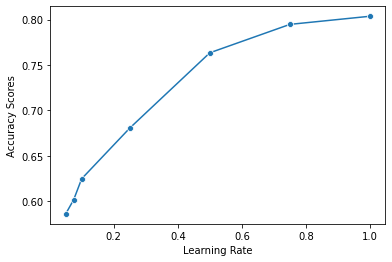

In [83]:
print("accuracy_list: ", accuracy_list)
print("learning_rate: ", lr_list)
sns.lineplot(x = lr_list, y = accuracy_list, marker = 'o')
plt.xlabel("Learning Rate")
plt.ylabel("Accuracy Scores")


precision_list [0.5947799351327575, 0.6152748935014143, 0.6375540958458148, 0.6895449120009609, 0.7839499584455659, 0.8036289506479918, 0.8111603832364519]


Text(0, 0.5, 'Precision Scores')

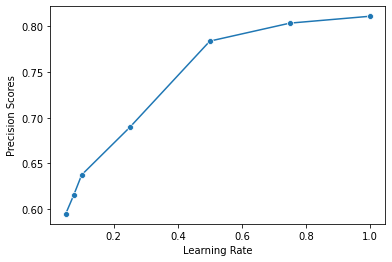

In [84]:
print("precision_list", precision_list)
sns.lineplot(x = lr_list, y = precision_list, marker = 'o')
plt.xlabel("Learning Rate")
plt.ylabel("Precision Scores")


Text(0, 0.5, 'Recall Scores')

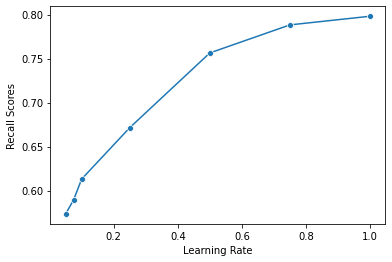

In [27]:
sns.lineplot(x = lr_list, y = recall_list, marker = 'o')
plt.xlabel("Learning Rate")
plt.ylabel("Recall Scores")


Text(0, 0.5, 'F1 Scores')

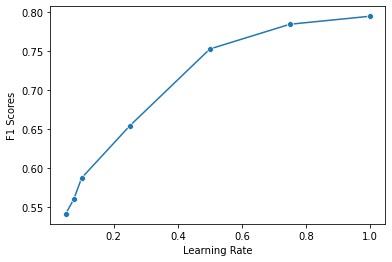

In [28]:
sns.lineplot(x = lr_list, y = f1_list, marker = 'o')
plt.xlabel("Learning Rate")
plt.ylabel("F1 Scores")


In [29]:
print("Best Accuracy: ", np.max(accuracy_list))
print("Best Precision: ", np.max(precision_list))
print("Best Recall: ", recall_list)
print("Best Recall: ", np.max(recall_list))
print("Best F1: ", np.max(f1_list))

Best Accuracy:  0.803690144969981
Best Precision:  0.8111603832364519
Best Recall:  [0.5734132761154732, 0.5895731767828264, 0.6130924365295043, 0.6714504583070001, 0.7564251112691448, 0.7883005212128216, 0.7981232576281647]
Best Recall:  0.7981232576281647
Best F1:  0.7950792505848525


In [85]:
xgb_clf = XGBClassifier()
# get the start time
st = time.time()

xgb_clf.fit(X_train, y_train - 1)
# get the end time
et = time.time()

# get the execution time
elapsed_time = et - st
print('Modelling training time:', elapsed_time, 'seconds')

score = xgb_clf.score(X_test, y_test - 1)
print(score)


Modelling training time: 13.916436910629272 seconds
0.9699809635378532


In [65]:
# make predictions on your test data
y_pred = xgb_clf.predict(X_test)
# print(y_pred)
# print(y_test-1)

i = 0
count = 0
y_test_list = y_test.values - 1
for i in range(0, len(y_test_list)):
    if (y_test_list[i] == y_pred[i]):
        count = count + 1
print(len(y_test_list))
print(count)

print("Manual Accuracy: ", count/len(y_test_list))

# calculate accuracy
accuracy = accuracy_score(y_test - 1, y_pred)

# calculate precision
precision = precision_score(y_test - 1, y_pred, average='weighted')

# calculate recall
recall = recall_score(y_test - 1, y_pred, average='weighted')

# calculate f1-score
f1 = f1_score(y_test - 1, y_pred, average='weighted')

print("accuracy: ", accuracy)
print("precision: ", precision)
print("recall: ", recall)
print("f1: ", f1)



6829
6606
Manual Accuracy:  0.9673451457021526
accuracy:  0.9673451457021526
precision:  0.9674664458654896
recall:  0.9673451457021526
f1:  0.967387581908733


In [67]:
cm = confusion_matrix(y_test-1, y_pred)
cm

array([[528,   0,   0,   0,  39,   2,   2,   3,   4,   3,   0],
       [  0, 715,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  1,   0, 632,   0,   0,   1,   0,   0,   2,   0,   1],
       [  0,   0,   1, 645,   0,   0,   0,   0,   0,   0,   0],
       [ 34,   0,   0,   0, 551,   0,   0,   0,   1,   1,   0],
       [  1,   0,   0,   0,   1, 611,   0,   1,   0,   1,   0],
       [  3,   0,   0,   0,   1,   0, 580,  43,   0,   0,   0],
       [  3,   0,   0,   0,   0,   0,  39, 602,   0,   1,   0],
       [  3,   0,   3,   0,   0,   1,   0,   0, 596,   4,   0],
       [ 13,   0,   0,   1,   3,   0,   0,   1,   4, 509,   0],
       [  0,   0,   1,   0,   0,   0,   0,   0,   0,   0, 637]])

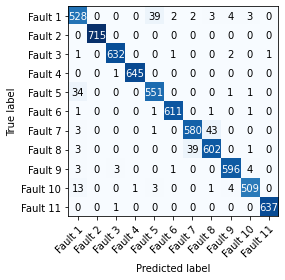

In [75]:
# plot the confusion matrix as an image
fig, ax = plt.subplots()
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
ax.set(xticks=np.arange(cm.shape[1]),
       yticks=np.arange(cm.shape[0]),
       xticklabels=['Fault ' + str(x) for x in range(1, 12)],
       yticklabels=['Fault ' + str(x) for x in range(1, 12)],
       xlabel='Predicted label',
       ylabel='True label')
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

# add the values to the plot
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j], 'd'), ha="center", va="center", color="white" if cm[i, j] > cm.max() / 2. else "black")

fig.tight_layout()
plt.show()
